In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
vaccinations_df = pd.read_csv('resources/country_vaccinations.csv')
owid_data_df = pd.read_csv('resources/owid-covid-data.csv')

In [4]:
merge_df = pd.merge(vaccinations_df, owid_data_df, on=["iso_code","date"], how='left')

In [5]:
merged_df_no_iso_code = merge_df.dropna(subset = ["iso_code"])

In [6]:
merged_df_no_iso_code.to_csv(path_or_buf="resources/merged_df_no_iso_code.csv", index=False)

In [7]:
organized_df = merged_df_no_iso_code[['country', 'iso_code', 'date', 'people_fully_vaccinated_per_hundred_x', 'daily_vaccinations_per_million']]

organized_df = organized_df.rename(columns={"country": "Country", "iso_code": "ISO Code", "date": "Date", "people_fully_vaccinated_per_hundred_x": "People Fully Vaccinated Per Hundred", "daily_vaccinations_per_million": "Daily Vaccinations Per Million"})

organized_df["People Fully Vaccinated Per Hundred"] = organized_df["People Fully Vaccinated Per Hundred"].fillna(0)
organized_df["Daily Vaccinations Per Million"] = organized_df["Daily Vaccinations Per Million"].fillna(0)

organized_df.head()

,Country,ISO Code,Date,People Fully Vaccinated Per Hundred,Daily Vaccinations Per Million
0,Algeria,DZA,1/29/2021,0.0,0.0
1,Algeria,DZA,1/30/2021,0.0,1.0
2,Andorra,AND,1/25/2021,0.0,0.0
3,Andorra,AND,1/26/2021,0.0,854.0
4,Andorra,AND,1/27/2021,0.0,854.0


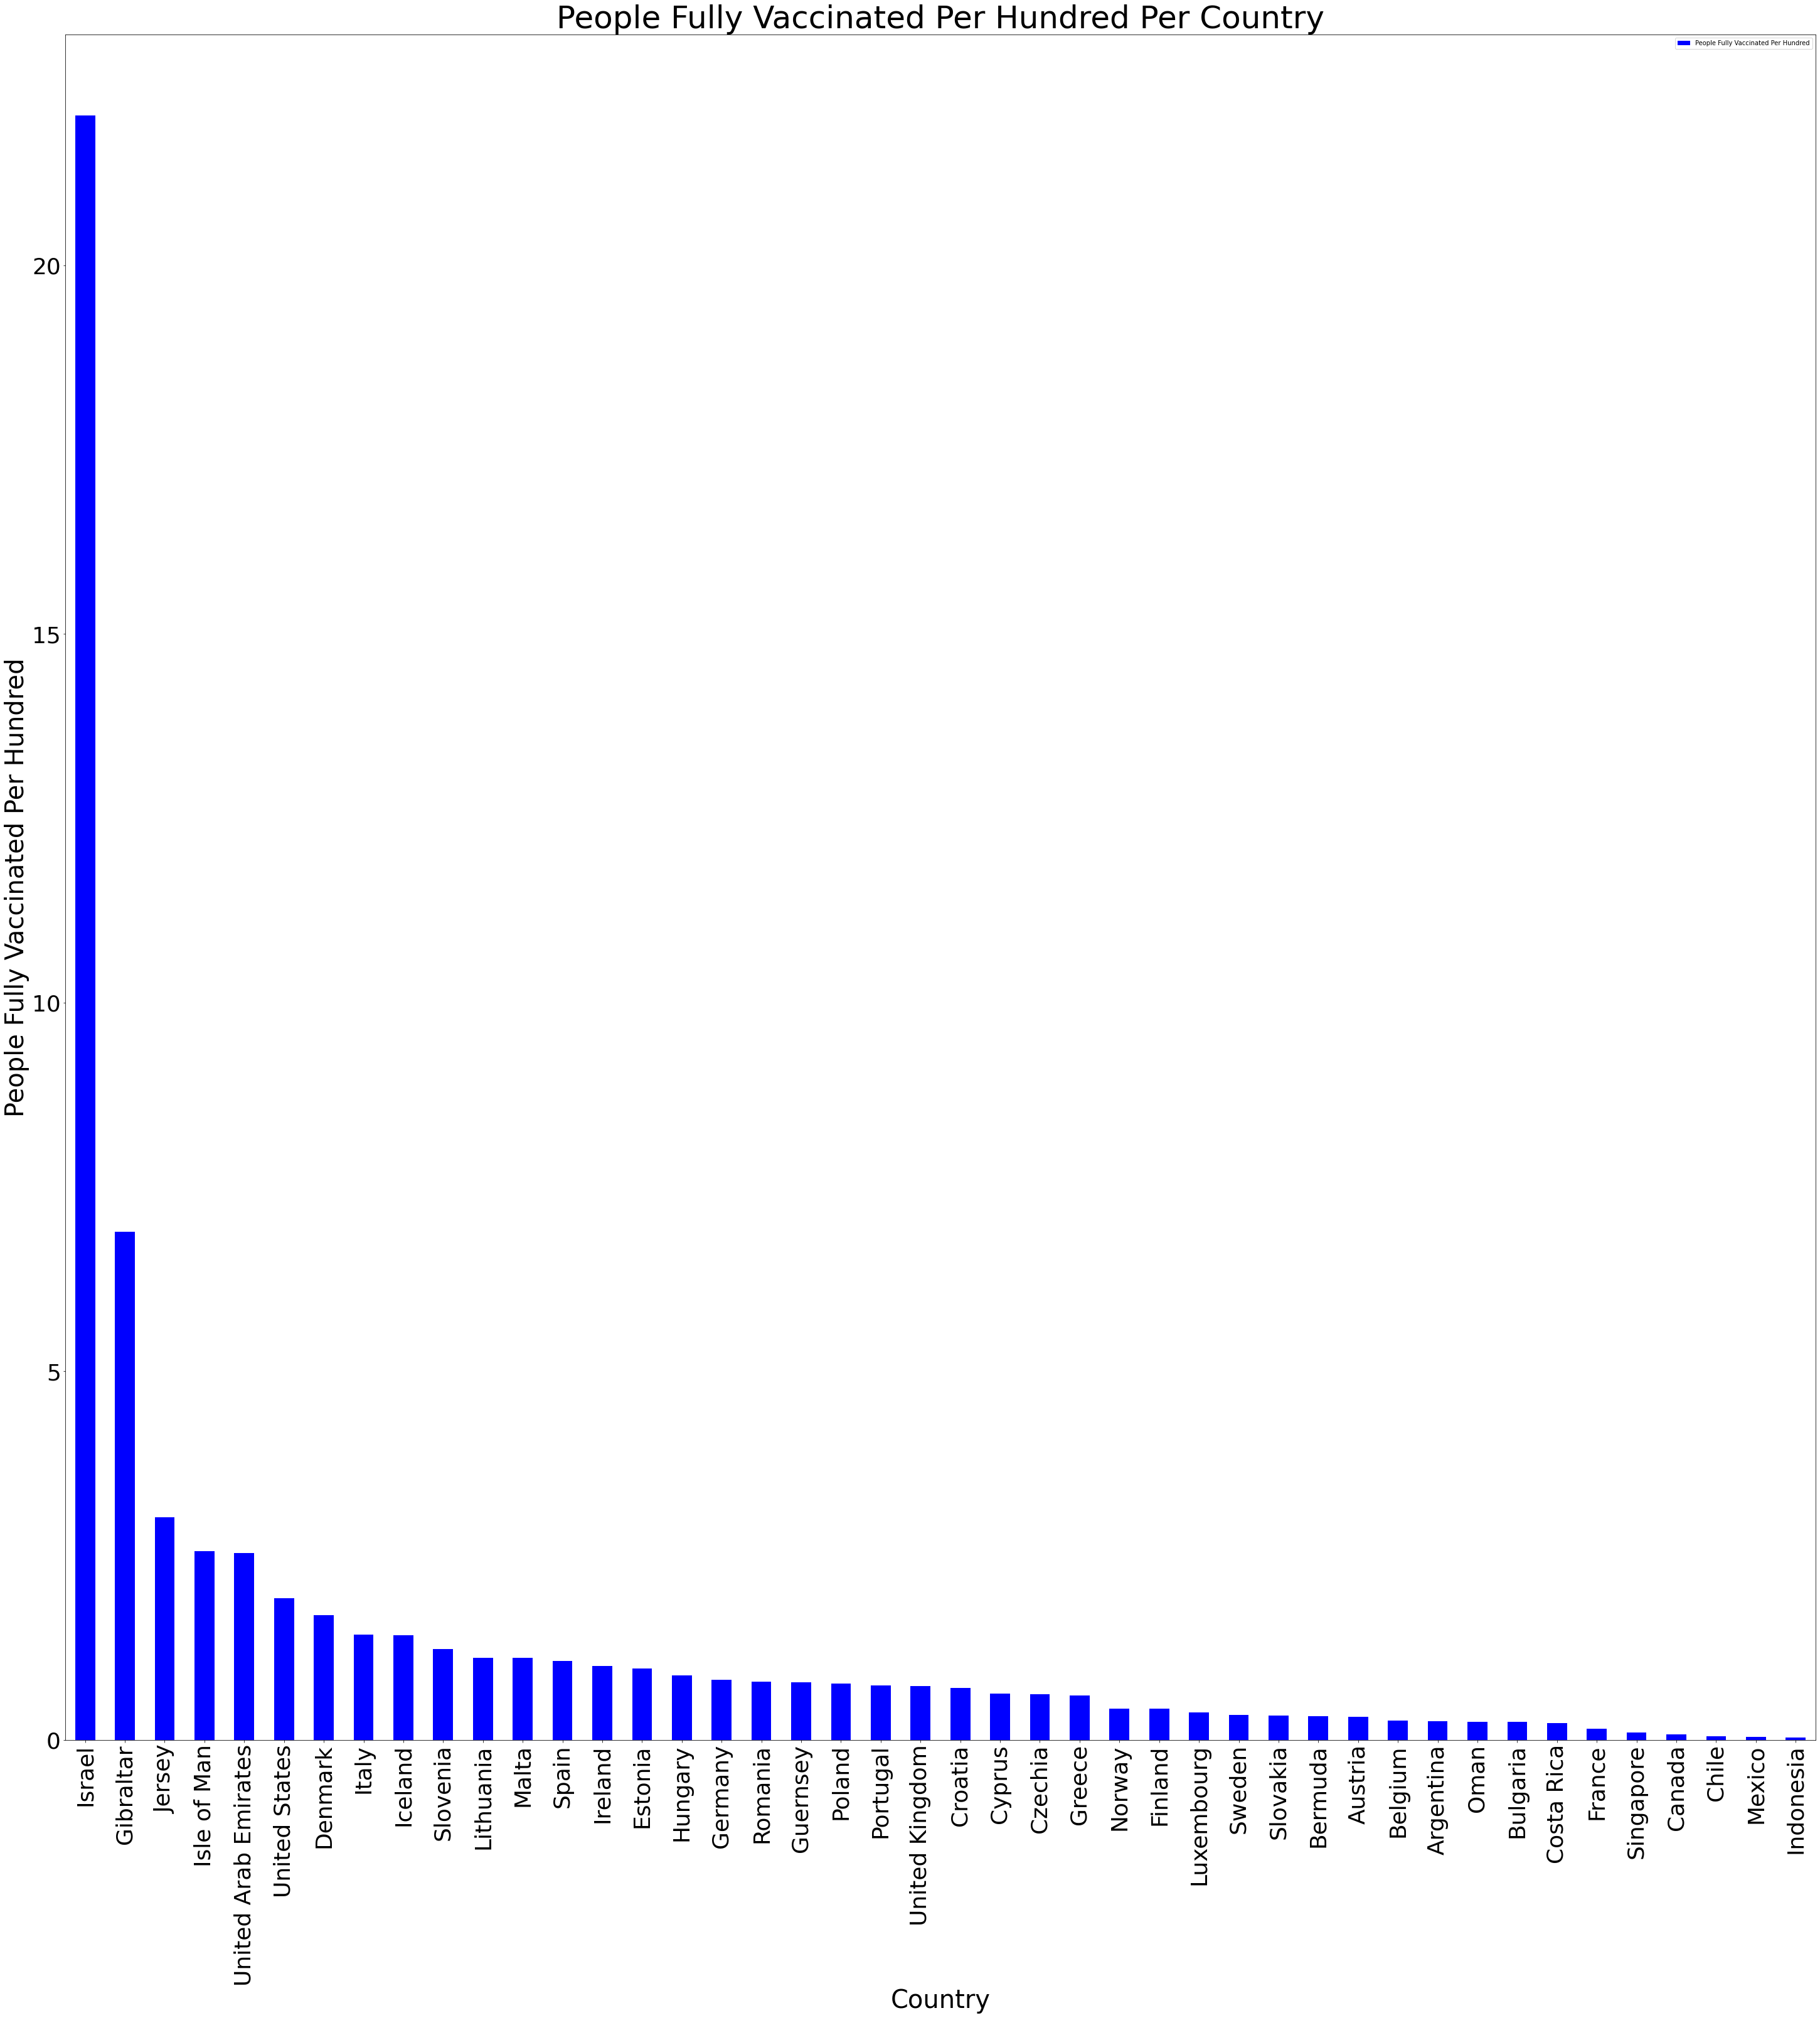

In [43]:
country_groupby_max_df = organized_df.groupby(["Country"]).max()

vaccinated = country_groupby_max_df.loc[country_groupby_max_df['People Fully Vaccinated Per Hundred'] != 0, :]
vaccinated = vaccinated.sort_values('People Fully Vaccinated Per Hundred', ascending = False).sort_values('People Fully Vaccinated Per Hundred', ascending = False)
vaccinated.reset_index(inplace = True)

vaccinated.plot(kind = 'bar', x = 'Country', y = 'People Fully Vaccinated Per Hundred', figsize = (50, 50), color = 'blue')

plt.title('People Fully Vaccinated Per Hundred Per Country', fontsize = 50)
plt.xlabel('Country', fontsize = 40)
plt.ylabel('People Fully Vaccinated Per Hundred', fontsize = 40)
plt.xticks(fontsize = 36)
plt.yticks(fontsize = 36)

plt.savefig("resources/People Fully Vaccinated Per Hundred.png")
plt.show()

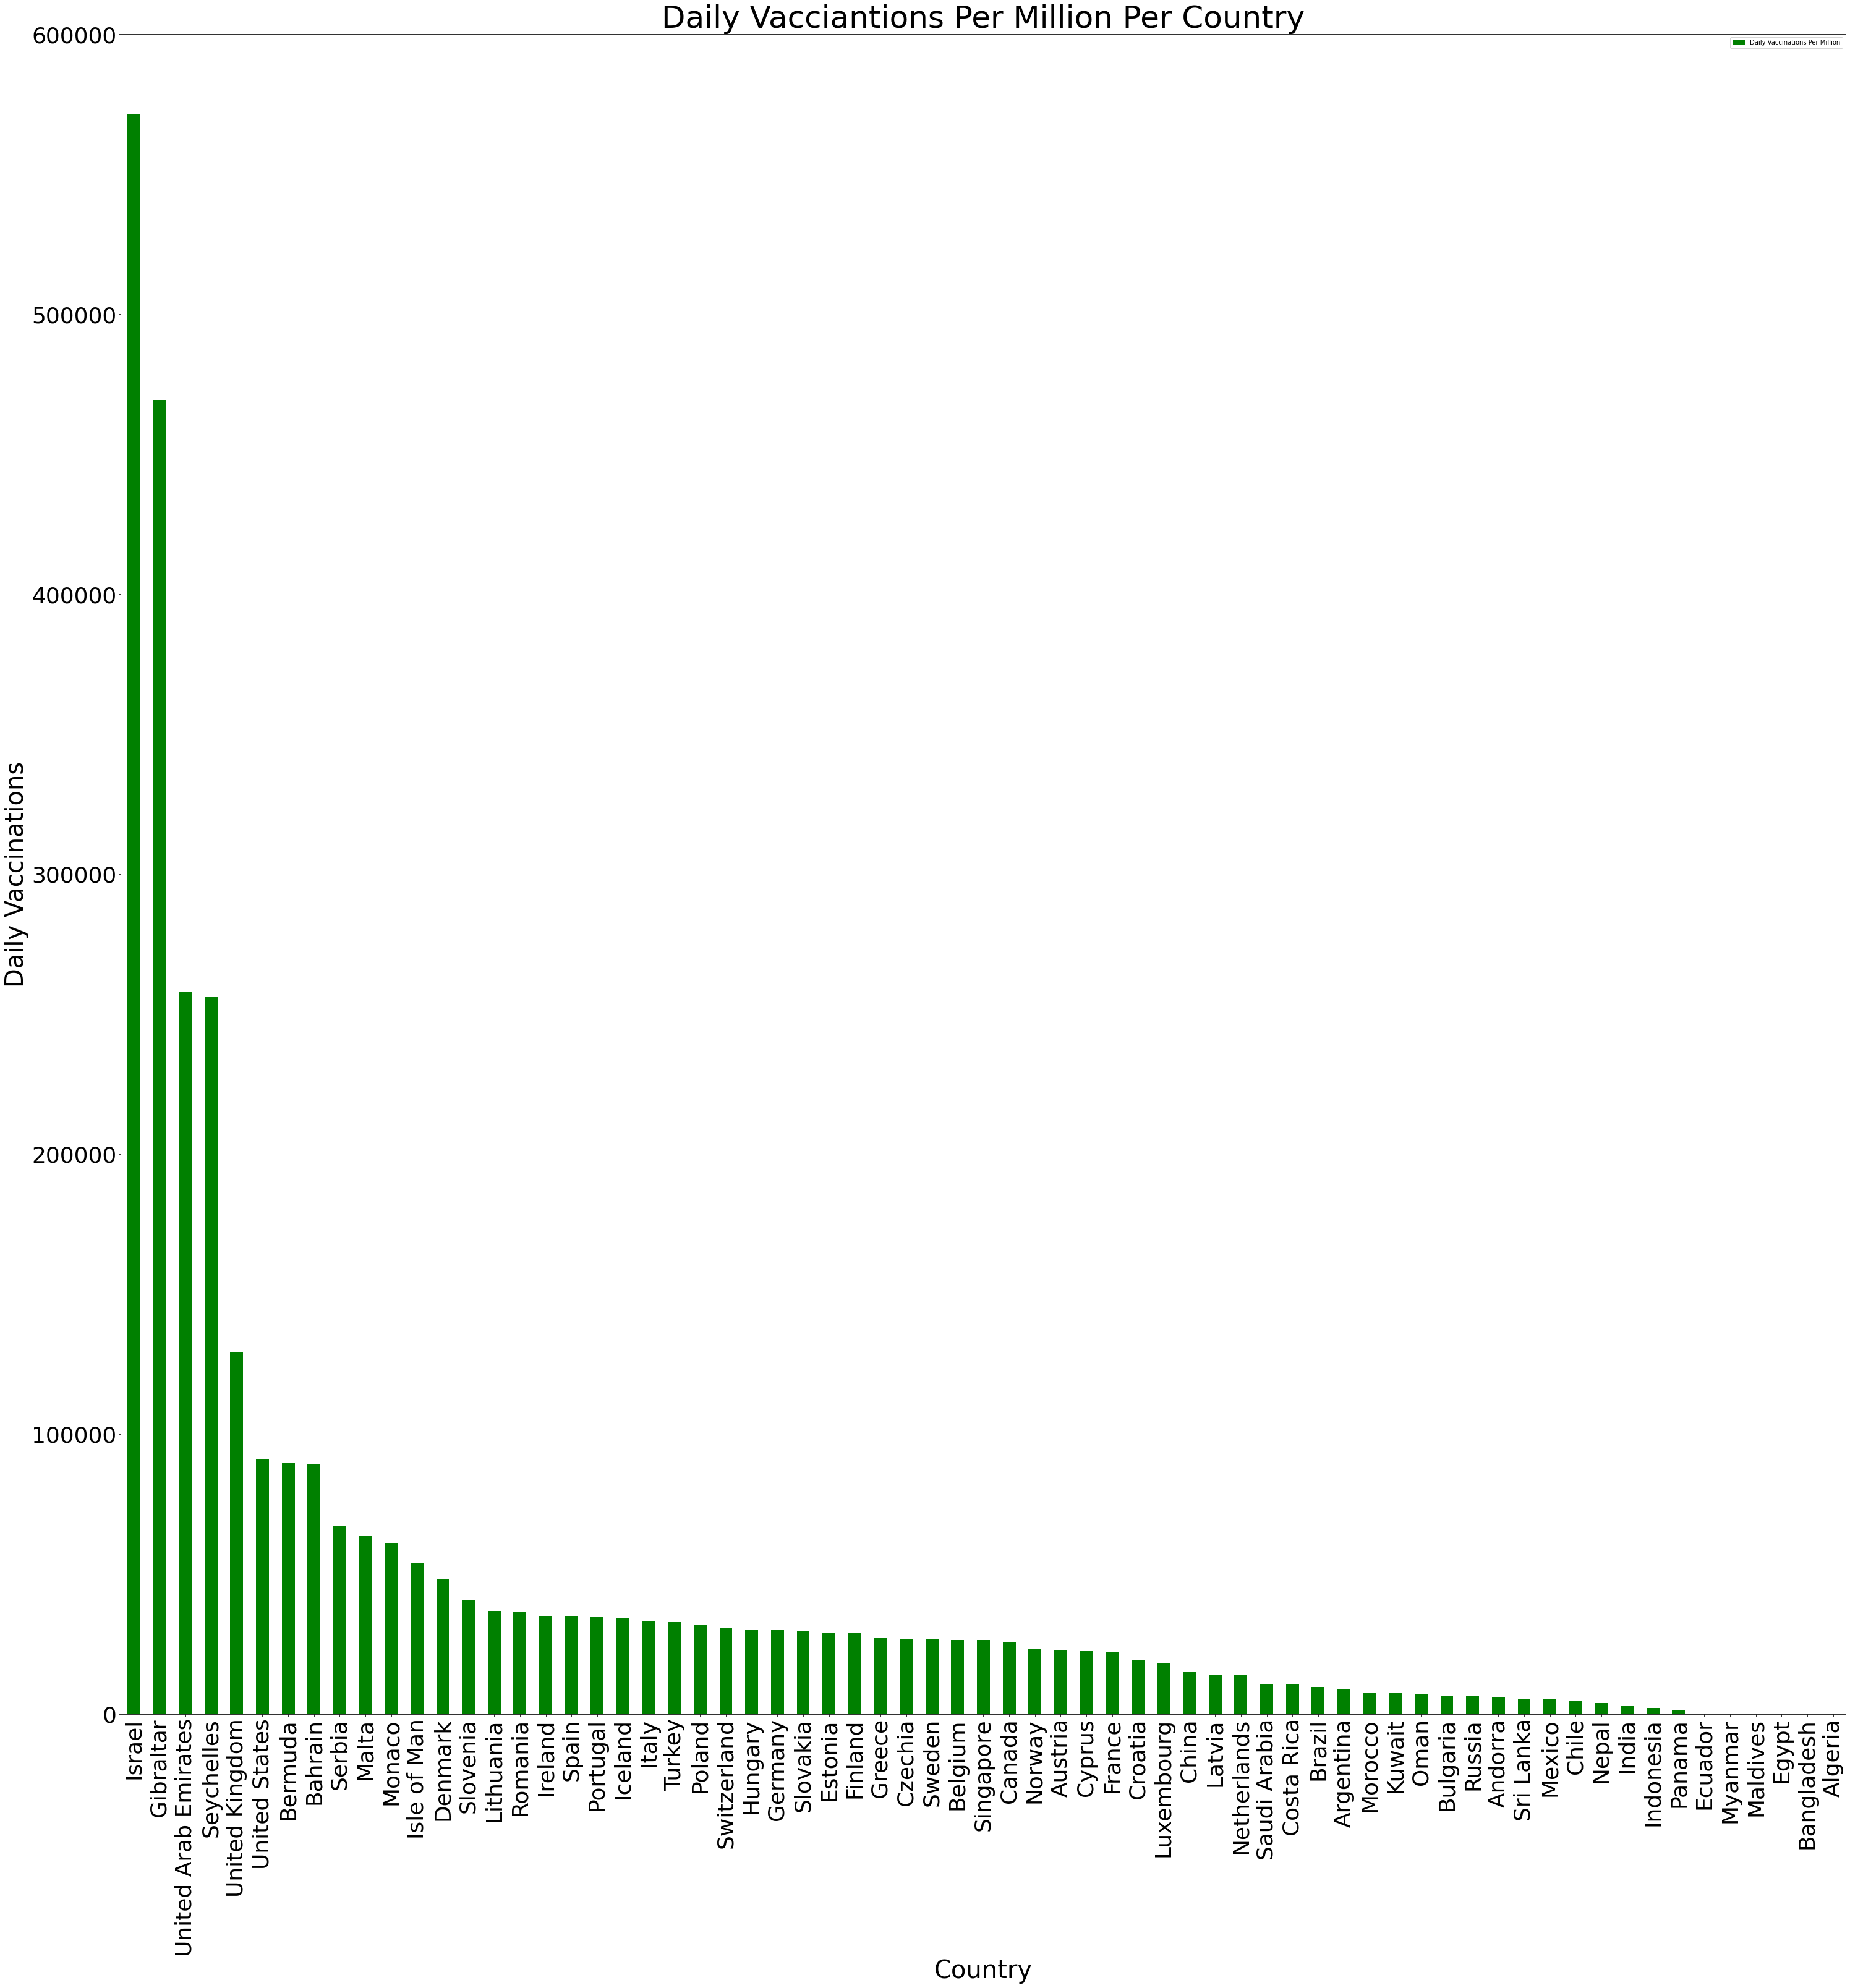

In [44]:
country_groupby_df = organized_df.groupby(["Country"]).sum()

daily_vaccinated = country_groupby_df.loc[country_groupby_df['Daily Vaccinations Per Million'] != 0, :]
daily_vaccinated = daily_vaccinated.sort_values('Daily Vaccinations Per Million', ascending = False)
daily_vaccinated.reset_index(inplace = True)

daily_vaccinated.plot(kind = 'bar', x = 'Country', y = 'Daily Vaccinations Per Million', figsize = (50, 50), color = 'green')

plt.title('Daily Vacciantions Per Million Per Country', fontsize = 50)
plt.xlabel('Country', fontsize = 40)
plt.ylabel('Daily Vaccinations', fontsize = 40)
plt.xticks(fontsize = 36)
plt.yticks(fontsize = 36)

plt.savefig("resources/Daily Vaccinated per Million.png")
plt.show()